# Installing Dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip list

^C


# Importing Librarires

In [1]:
import tensorflow as tf
import os
import cv2
import imghdr #to play with extensions
import matplotlib.pyplot as plt
import numpy as np

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_dir = 'PlantVillage'
os.listdir(data_dir)

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Tomato_Bacterial_spot',
 'Tomato_healthy']

In [3]:
os.listdir(os.path.join(data_dir,'Pepper__bell___Bacterial_spot'))

['0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG',
 '006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG',
 '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG',
 '01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG',
 '0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG',
 '018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG',
 '01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG',
 '01dfb88b-cd5a-420c-b163-51f5fe07b74d___JR_B.Spot 9091.JPG',
 '01ebc916-4793-40a3-b5e4-a32687e4fa3d___NREC_B.Spot 9125.JPG',
 '024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.JPG',
 '02baf62e-11e2-4dde-97fb-e369b57d55d3___JR_B.Spot 8971.JPG',
 '032aa7c4-0a95-4f09-b0bb-1242f4f32d82___NREC_B.Spot 1889.JPG',
 '03bb7042-3fd5-42e1-aa2c-d51d6843704c___JR_B.Spot 8925.JPG',
 '0448a226-3d3a-494d-a026-a92b048689c7___JR_B.Spot 8897.JPG',
 '0495b4d4-66a4-438c-862d-c483f08e4a95___JR_B.Spot 3288.JPG',
 '04d46cfb-9cc8-4083-82af-ca2bb57c8182___NREC_B.Spot 1814.JPG'

In [4]:
img = cv2.imread(os.path.join(data_dir,'Pepper__bell___Bacterial_spot','0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG'))

In [5]:
img.shape

(256, 256, 3)

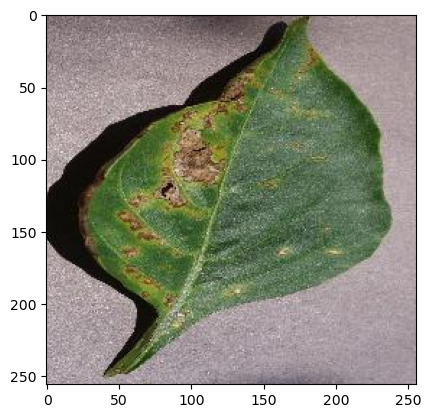

In [6]:

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

# Load Data

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir) #veryOP teras function

Found 8333 files belonging to 7 classes.


In [8]:
class_names = data.class_names
for i in range(0,7):
    print(f"Class '{i}' name:", class_names[i])

Class '0' name: Pepper__bell___Bacterial_spot
Class '1' name: Pepper__bell___healthy
Class '2' name: Potato___Early_blight
Class '3' name: Potato___Late_blight
Class '4' name: Potato___healthy
Class '5' name: Tomato_Bacterial_spot
Class '6' name: Tomato_healthy


In [9]:
# data_iterator = data.as_numpy_iterator()

In [10]:
# batch = data_iterator.next()

In [11]:
#batch #has 2 parts.....first is image and next is labels(which class image belongs to) and each  batch has 32 images as default

In [12]:
# fig, ax = plt.subplots(ncols=4,figsize=(20,20))
# for idx,img in enumerate(batch[0][:4]):
#     ax[idx].imshow(img)
#     ax[idx].title.set_text(batch[1][idx])

In [13]:
# batch[0].max()

In [14]:
# scaled = batch[0]/255

In [15]:
# scaled.max()

# Scaling Data 

In [16]:
scaled_data = data.map(lambda x,y:(x/255,y))

In [17]:
batch = scaled_data.as_numpy_iterator().next()

In [18]:
len(batch[1])

32

In [19]:
batch[0].max()

1.0

In [20]:
len(scaled_data)

261

In [21]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1)+1

In [22]:
print(train_size)
print(val_size)
print(test_size)

182
52
27


In [23]:
train = scaled_data.take(train_size)
val = scaled_data.skip(train_size).take(val_size)
test = scaled_data.skip(train_size+val_size).take(test_size)

# Deep Learning Model 

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
images, labels = batch 

In [26]:
# from keras.utils import to_categorical

# # Assuming you've loaded 'images' and 'labels' from your dataset

# # One-hot encode the labels
# labels_one_hot = to_categorical(labels)

In [54]:
model = Sequential()

In [55]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

In [56]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,698,167 (14.11 MB)

 Trainable params: 3,698,167 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
from keras.callbacks import EarlyStopping

# Define the EarlyStopping callback
early_stopping_callback = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, min_delta=0.01, baseline=0.96)

# # Train the model with the EarlyStopping callback
# hist = model.fit(train, epochs=20, validation_data=val, callbacks=[early_stopping_callback])

hist = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 69s 366ms/step - accuracy: 0.5428 - loss: 1.2272 - val_accuracy: 0.8137 - val_loss: 0.5436
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 67s 364ms/step - accuracy: 0.8507 - loss: 0.4114 - val_accuracy: 0.9207 - val_loss: 0.2511
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 66s 363ms/step - accuracy: 0.9174 - loss: 0.2387 - val_accuracy: 0.9273 - val_loss: 0.2507
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 67s 365ms/step - accuracy: 0.9449 - loss: 0.1621 - val_accuracy: 0.9087 - val_loss: 0.3074
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 76s 417ms/step - accuracy: 0.9619 - loss: 0.1217 - val_accuracy: 0.9147 - val_loss: 0.2722
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 381ms/step - accuracy: 0.9726 - loss: 0.0792 - val_accuracy: 0.9453 - val_loss: 0.1886
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 71s 391ms/step - accuracy: 0.9763 - loss: 0.0609 - val_accuracy: 0.9279 - val_loss: 0.2415
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 72s 396ms/step - accuracy: 0.9759 - loss: 0

In [61]:
hist = model.fit(train, epochs=15, initial_epoch=10, validation_data=val)

Epoch 11/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 80s 439ms/step - accuracy: 0.9877 - loss: 0.0387 - val_accuracy: 0.9465 - val_loss: 0.2395
Epoch 12/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 84s 459ms/step - accuracy: 0.9807 - loss: 0.0492 - val_accuracy: 0.9657 - val_loss: 0.1663
Epoch 13/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 84s 461ms/step - accuracy: 0.9977 - loss: 0.0104 - val_accuracy: 0.9453 - val_loss: 0.1978
Epoch 14/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 80s 439ms/step - accuracy: 0.9871 - loss: 0.0397 - val_accuracy: 0.9519 - val_loss: 0.2163
Epoch 15/15
182/182 ━━━━━━━━━━━━━━━━━━━━ 70s 384ms/step - accuracy: 0.9933 - loss: 0.0247 - val_accuracy: 0.9315 - val_loss: 0.2873


In [ ]:
# hist = model.fit(train, epochs=20, initial_epoch=15, validation_data=val)

In [ ]:
# hist = model.fit(train, epochs=25, initial_epoch=20, validation_data=val)

# Plotting Results

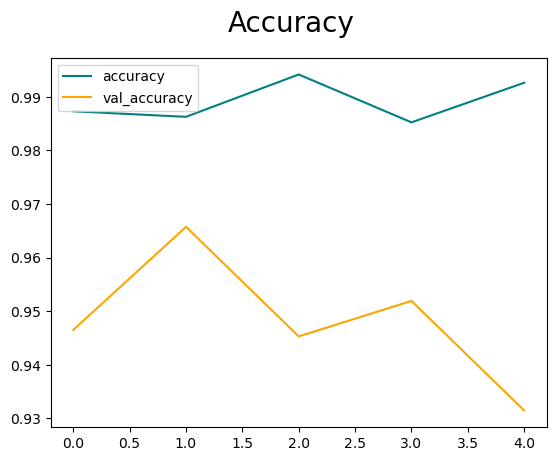

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

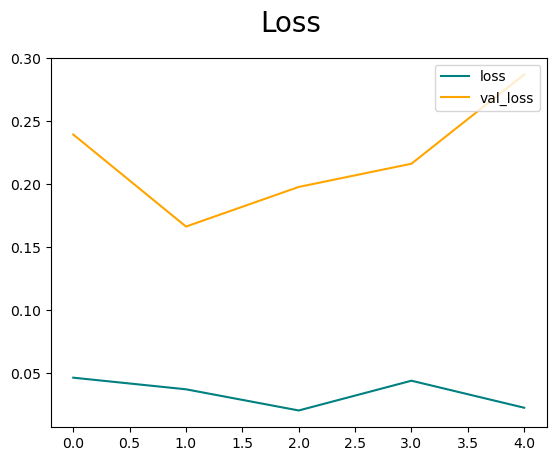

In [63]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.show()

# Evaluate on Test Data

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    
print(pre.result(), re.result(), acc.result())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


InvalidArgumentError: {{function_node __wrapped__LogicalAnd_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [1,32] vs. [1,224] [Op:LogicalAnd] name: 

# Test

In [46]:
os.listdir('TestImages')

['potato_earlyBlight.JPG', 'potato_lateBlight.JPG', 'tomatoHealthy.JPG']

In [47]:
class_names

['Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Tomato_Bacterial_spot',
 'Tomato_healthy']

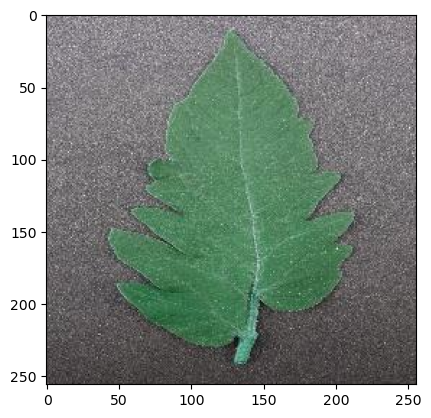

In [64]:
test_img = cv2.imread(os.path.join('TestImages','tomatoHealthy.JPG'))
plt.imshow(test_img)
plt.show()

In [ ]:
# resize = tf.image.resize(test_img, (256,256))
# plt.imshow(resize.numpy().astype(int))
# plt.show()

In [65]:
predictions = model.predict(np.expand_dims(test_img/255, axis=0))

# Interpret predictions
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]  

print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Predicted class: Tomato_healthy


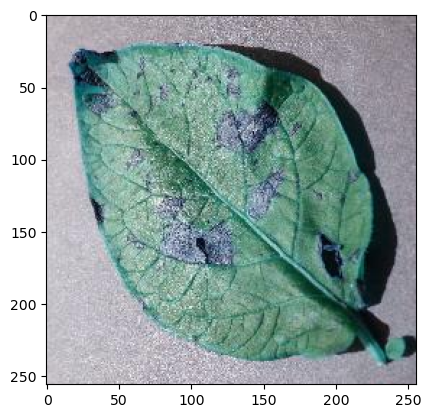

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class: Pepper__bell___healthy


In [66]:
test_img1 = cv2.imread(os.path.join('TestImages','potato_earlyBlight.JPG'))
plt.imshow(test_img1)
plt.show()
test_img1 = np.array(test_img1) / 255.0
predictions = model.predict(np.expand_dims(test_img1, axis=0))

# Interpret predictions
predicted_class_index = np.argmax(predictions)
predicted_class = class_names[predicted_class_index]  

print("Predicted class:", predicted_class)

In [ ]:
#os.listdir(os.path.join('TestImages','pepperBell_bacterialSpot.jpg'))

In [ ]:
predictions

In [ ]:
predicted_class_index

# Save Model

In [ ]:
from keras.models import load_model

model.save('model/plantDiseaseDetection_model_ScaledData.h5')

# Git

!git commit -m "commiting model"

!git remote -v

!git remote add origin https://github.com/DweepVartak/PlantDisease-using-CNN.git

!git branch -M main

!git push origin main

!git fetch origin

!git merge origin/main --allow-unrelated-histories


!git rm "CNN model.ipynb"


!git clean df

In [48]:
!git add .

In [49]:
!git commit -m "Updated model adn saved model file"

[main 273255d2] Updated model adn saved model file
 9 files changed, 26272 insertions(+), 176 deletions(-)
 create mode 100644 .ipynb_checkpoints/CNN model-checkpoint.ipynb
 create mode 100644 Frontend/app.js
 create mode 100644 Frontend/index.html
 create mode 100644 Frontend/styles.css
 create mode 100644 Outputs/CNN model.ipynb
 create mode 100644 Outputs/perfect plots.jpg
 create mode 100644 Outputs/perfect training.jpg
 create mode 100644 model/plantDiseaseDetection_model.h5


In [50]:
!git push origin main

To https://github.com/DweepVartak/PlantDisease-using-CNN.git
   1a9d92f5..273255d2  main -> main
